# Análisis Exploratorio de Datos (EDA)
## Turkish Music Emotion Dataset - Versión Limpia

**Objetivo:** Realizar un análisis exploratorio profesional del dataset de emociones en música turca para identificar patrones, relaciones y características relevantes para el modelado predictivo.

**Dataset:** turkish_music_emotion_cleaned.csv

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from typing import List, Tuple
import warnings

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10


Librerías cargadas correctamente


## 1. Carga y Exploración Inicial de Datos

In [ ]:
# Cargar dataset limpio
RUTA_DATOS = '/Users/tabotavin/Desktop/MNA-MLOps-Proyecto-Equipo03/data/turkish_music_emotion_cleaned.csv'
df = pd.read_csv(RUTA_DATOS)

print(f"Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnas")
df.head()

Dataset cargado: 403 filas x 51 columnas
Tamaño en memoria: 0.18 MB



,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.554,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,28.106,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.333,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [54]:
# Verificar tipos de datos y valores nulos
info_data = pd.DataFrame({
    'Tipo': df.dtypes,
    'No Nulos': df.count(),
    'Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})

print(f"Tipos de datos:\n{df.dtypes.value_counts()}\n")
print(f"Total de valores nulos: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() > 0:
    print(f"\nColumnas con nulos:")
    print(info_data[info_data['Nulos'] > 0].sort_values('Nulos', ascending=False))
else:
    print("✓ No hay valores nulos en el dataset")

Tipos de datos:
float64    50
object      1
Name: count, dtype: int64

Total de valores nulos: 0
✓ No hay valores nulos en el dataset


## 2. Análisis de la Variable Objetivo

In [55]:
# Analizar variable objetivo: distribución de emociones
distribucion = df['Class'].value_counts().sort_index()
proporcion = df['Class'].value_counts(normalize=True).sort_index() * 100

print("Distribución de emociones:")
for emocion, cantidad in distribucion.items():
    prop = proporcion[emocion]
    print(f"  {emocion:<10} : {cantidad:>3} ({prop:>5.2f}%)")

print(f"\nTotal de clases: {df['Class'].nunique()}")

# Calcular balance
max_clase = distribucion.max()
min_clase = distribucion.min()
ratio_balance = min_clase / max_clase

print(f"\nBalance de clases (ratio min/max): {ratio_balance:.2f}")
if ratio_balance >= 0.8:
    print("✓ Dataset balanceado")
elif ratio_balance >= 0.6:
    print("⚠ Moderadamente desbalanceado")
else:
    print("✗ Significativamente desbalanceado")

Distribución de emociones:
  angry      :  97 (24.07%)
  happy      : 102 (25.31%)
  relax      : 102 (25.31%)
  sad        : 102 (25.31%)

Total de clases: 4

Balance de clases (ratio min/max): 0.95
✓ Dataset balanceado


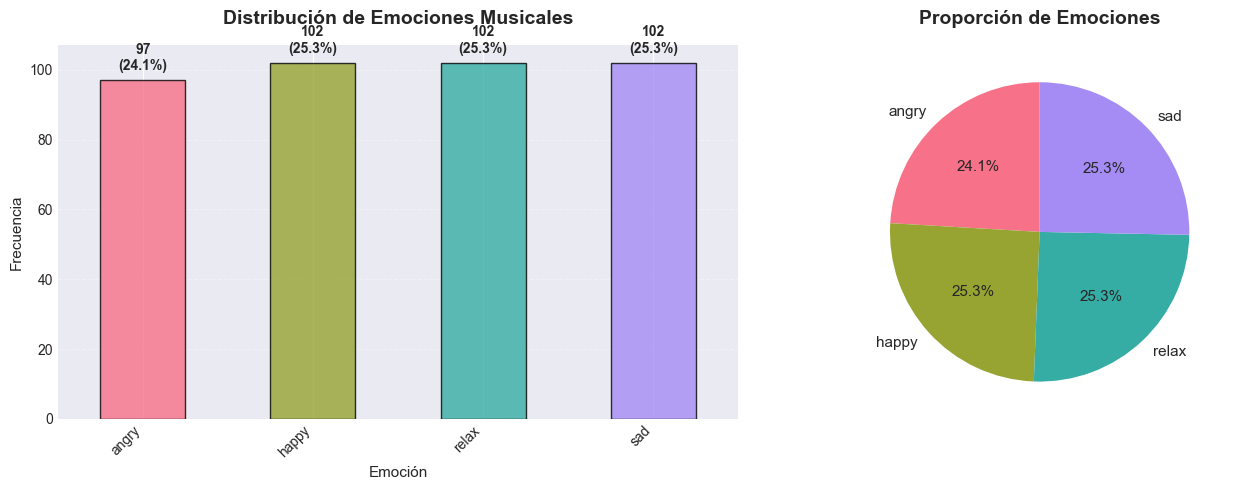

In [56]:
# Visualizar distribución de emociones
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette("husl", len(distribucion))
distribucion.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black', alpha=0.8)
axes[0].set_title('Distribución de Emociones Musicales', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Emoción', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

for i, (idx, value) in enumerate(distribucion.items()):
    axes[0].text(i, value + 2, f'{value}\n({proporcion[idx]:.1f}%)', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].pie(distribucion, labels=distribucion.index, autopct='%1.1f%%', 
           colors=colors, startangle=90, textprops={'fontsize': 11})
axes[1].set_title('Proporción de Emociones', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

## 3. Análisis Estadístico de Variables Numéricas

In [57]:
# Estadísticas descriptivas de variables numéricas
df_numeric = df.select_dtypes(include=[np.number])

print(f"Variables numéricas: {df_numeric.shape[1]}\n")
df_numeric.describe().T

Variables numéricas: 50



,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,403.0,3.287270,47.522514,0.010,0.0860,0.1290,0.1750,873.096
_Lowenergy_Mean,403.0,4.251114,50.776812,0.302,0.5230,0.5540,0.5845,805.528
_Fluctuation_Mean,403.0,9.744129,32.281770,3.987,5.8715,6.7540,7.8405,483.105
_Tempo_Mean,403.0,153.151679,601.415500,48.284,101.9665,119.6345,146.6600,12177.714
_MFCC_Mean_1,403.0,6.261690,37.074813,0.423,1.9595,2.4230,2.8980,565.490
_MFCC_Mean_2,403.0,7.598483,77.807360,-43.608,-0.2670,0.0595,0.4065,946.483
_MFCC_Mean_3,403.0,8.881551,74.381974,-0.870,0.3015,0.4820,0.6850,721.726
_MFCC_Mean_4,403.0,2.486005,49.567937,-11.560,-0.1160,0.0490,0.1970,994.982
_MFCC_Mean_5,403.0,5.628364,54.587410,-0.494,0.0630,0.1885,0.2960,683.085
_MFCC_Mean_6,403.0,0.035454,0.206815,-0.916,-0.0785,0.0480,0.1525,0.799


In [58]:
# Analizar variabilidad de las variables
variabilidad = pd.DataFrame({
    'Media': df_numeric.mean(),
    'Mediana': df_numeric.median(),
    'Std': df_numeric.std(),
    'CV': (df_numeric.std() / df_numeric.mean() * 100).abs(),  # Coeficiente de variación
    'Rango': df_numeric.max() - df_numeric.min(),
    'IQR': df_numeric.quantile(0.75) - df_numeric.quantile(0.25)
})

variabilidad_top = variabilidad.nlargest(10, 'CV')

print("Top 10 variables con mayor variabilidad (Coeficiente de Variación):")
print(variabilidad_top[['Media', 'Std', 'CV']].round(2))

Top 10 variables con mayor variabilidad (Coeficiente de Variación):
                    Media    Std       CV
_MFCC_Mean_12        0.01   0.32  3741.37
_MFCC_Mean_10        0.77  15.64  2028.80
_MFCC_Mean_4         2.49  49.57  1993.88
_MFCC_Mean_8         2.17  42.59  1965.88
_MFCC_Mean_13        1.01  19.79  1955.97
_Roughness_Slope     2.55  48.10  1886.52
_MFCC_Mean_11        0.05   0.87  1853.98
_MFCC_Mean_7         1.36  24.99  1840.19
_MFCC_Mean_9         0.09   1.71  1824.81
_Chromagram_Mean_4   1.50  25.82  1726.87


## 4. Distribuciones de Variables Clave

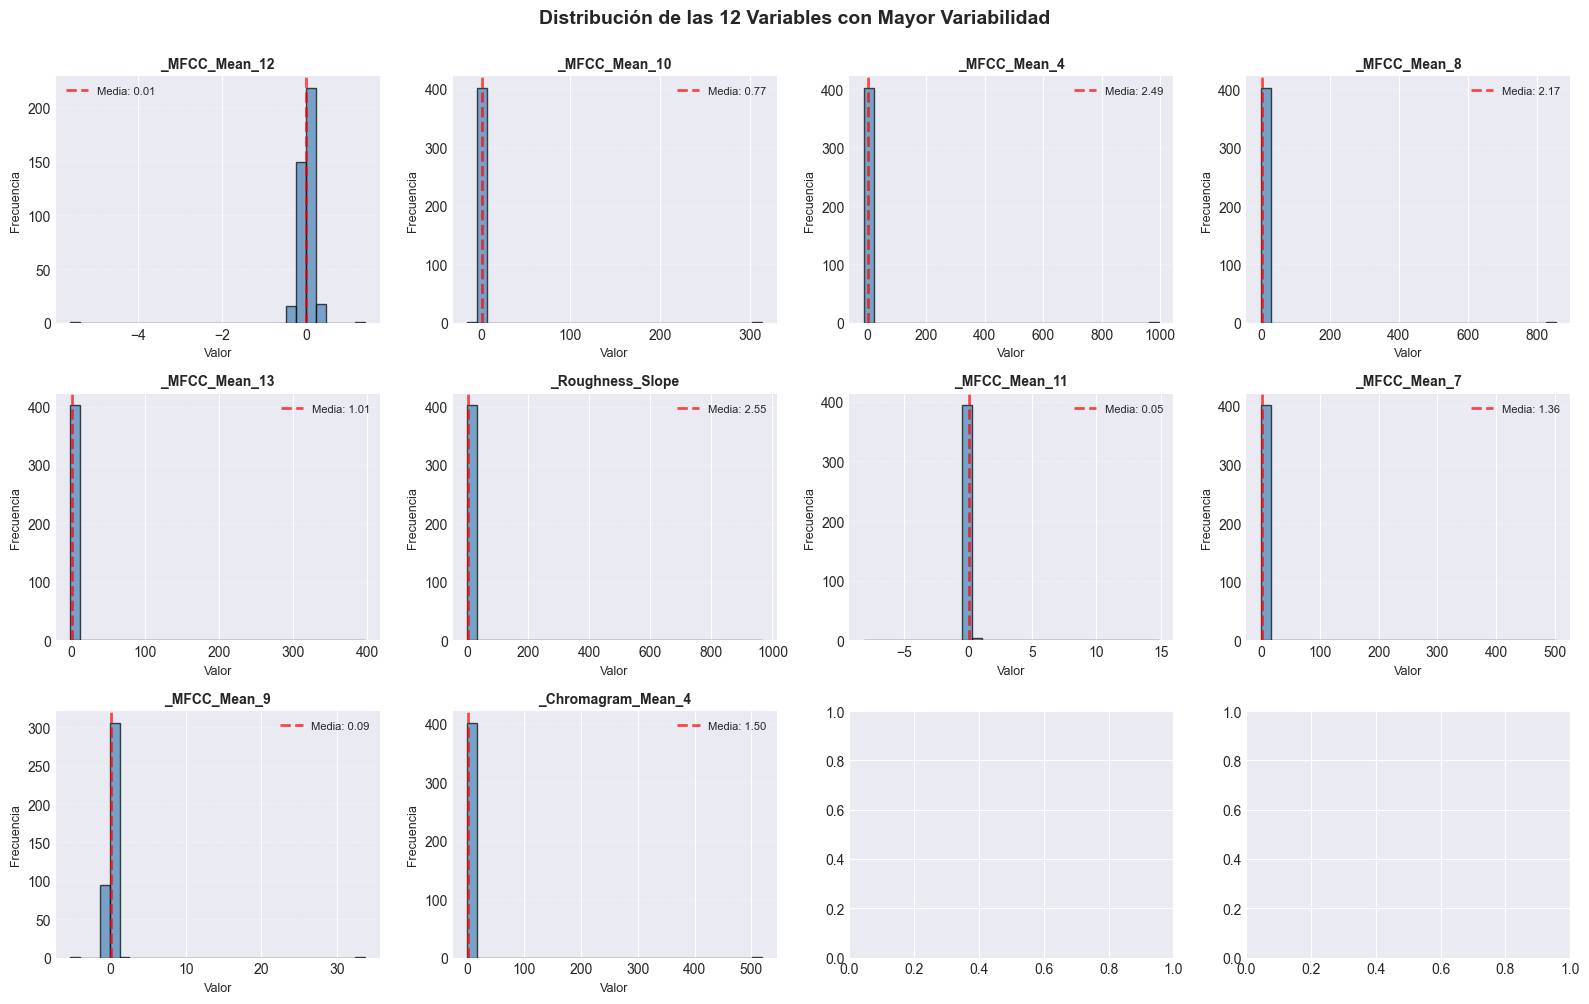

In [59]:
# Visualizar distribuciones de variables más variables
variables_interes = variabilidad_top.index[:12]

fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(variables_interes):
    axes[idx].hist(df_numeric[col], bins=30, color='steelblue', 
                  edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valor', fontsize=9)
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    mean_val = df_numeric[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', 
                     linewidth=2, alpha=0.7, label=f'Media: {mean_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.suptitle('Distribución de las 12 Variables con Mayor Variabilidad', 
            fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 5. Detección de Outliers

In [60]:
# Detectar outliers usando método IQR
def detectar_outliers_iqr(data: pd.Series) -> Tuple[int, float, float]:
    """Detecta outliers usando el método IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = ((data < limite_inferior) | (data > limite_superior)).sum()
    return outliers, limite_inferior, limite_superior

outliers_info = []
for col in df_numeric.columns:
    num_outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_numeric[col])
    pct_outliers = (num_outliers / len(df_numeric)) * 100
    outliers_info.append({
        'Variable': col,
        'Outliers': num_outliers,
        '% Outliers': pct_outliers,
        'Lim_Inferior': lim_inf,
        'Lim_Superior': lim_sup
    })

df_outliers = pd.DataFrame(outliers_info).sort_values('Outliers', ascending=False)

print("Top 15 variables con más outliers:")
print(df_outliers.head(15)[['Variable', 'Outliers', '% Outliers']].to_string(index=False))

total_outliers = df_outliers['Outliers'].sum()
print(f"\nTotal de outliers: {total_outliers}")
print(f"Variables con outliers: {(df_outliers['Outliers'] > 0).sum()} de {len(df_numeric.columns)}")

Top 15 variables con más outliers:
                                      Variable  Outliers  % Outliers
                              _AttackTime_Mean        40    9.925558
                        _Spectralkurtosis_Mean        39    9.677419
                            _Chromagram_Mean_4        23    5.707196
                            _Chromagram_Mean_7        22    5.459057
                        _Spectralskewness_Mean        21    5.210918
                                  _MFCC_Mean_1        21    5.210918
                       _EntropyofSpectrum_Mean        19    4.714640
                            _Chromagram_Mean_2        19    4.714640
_HarmonicChangeDetectionFunction_PeriodEntropy        19    4.714640
                                 _MFCC_Mean_11        18    4.466501
                               _Roughness_Mean        18    4.466501
                                  _MFCC_Mean_6        17    4.218362
                                  _MFCC_Mean_4        16    3.970223

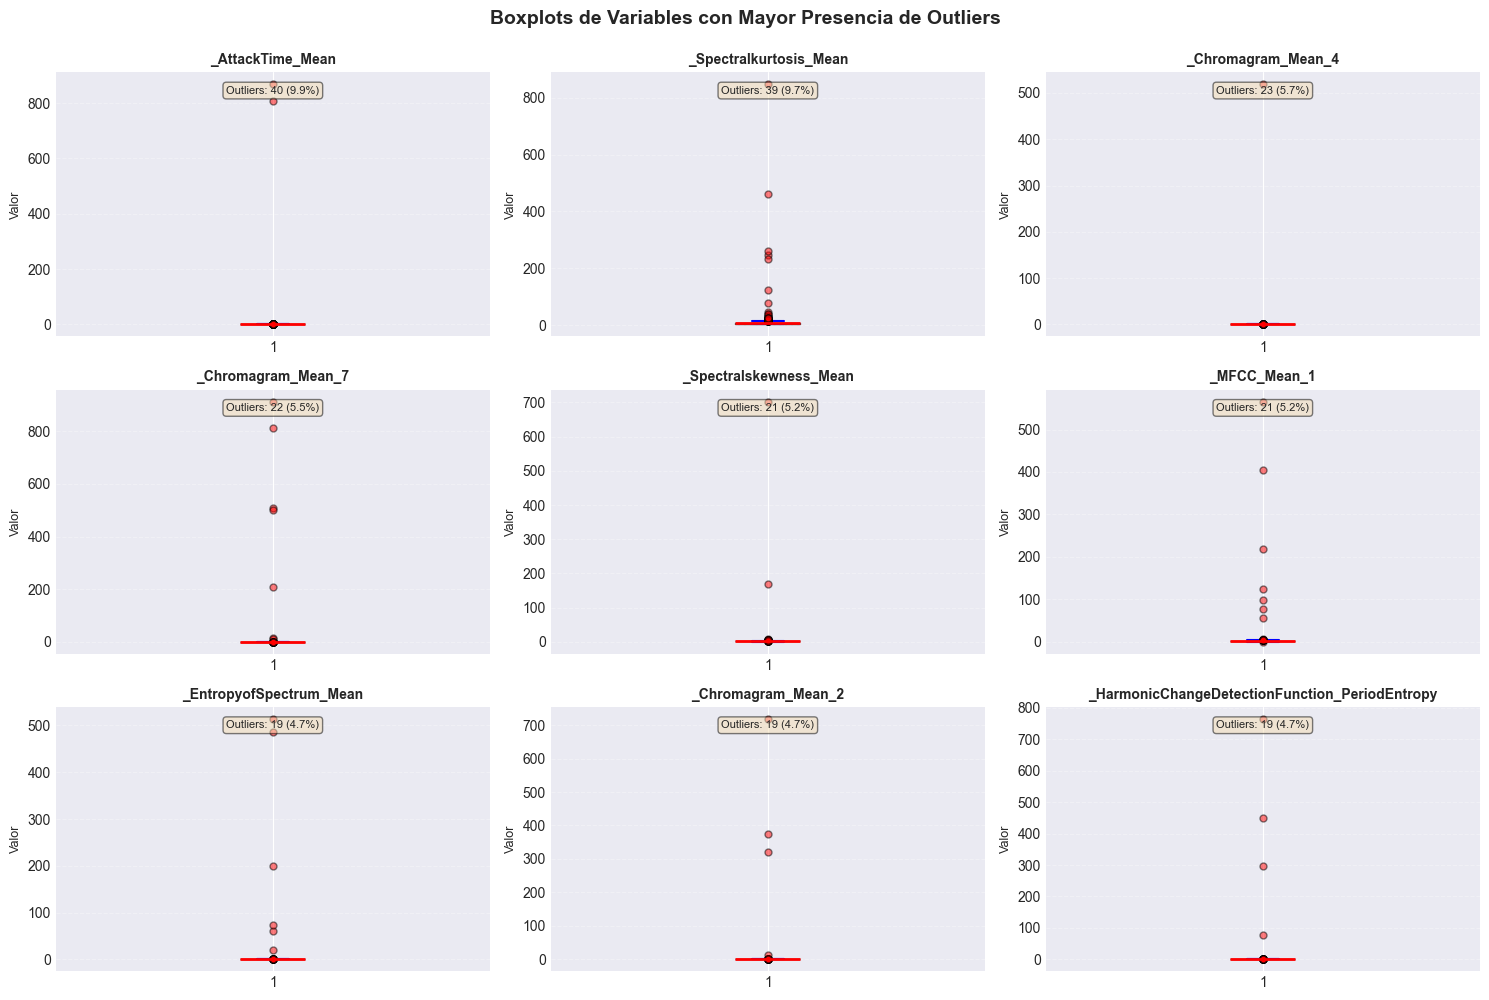

In [61]:
# Visualizar outliers con boxplots
variables_con_outliers = df_outliers[df_outliers['Outliers'] > 0].head(9)['Variable'].tolist()

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(variables_con_outliers):
    bp = axes[idx].boxplot(df_numeric[col], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           medianprops=dict(color='red', linewidth=2),
                           whiskerprops=dict(color='blue', linewidth=1.5),
                           capprops=dict(color='blue', linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='red', 
                                         markersize=5, alpha=0.5))
    
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Valor', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    
    num_out = df_outliers[df_outliers['Variable'] == col]['Outliers'].values[0]
    pct_out = df_outliers[df_outliers['Variable'] == col]['% Outliers'].values[0]
    axes[idx].text(0.5, 0.95, f'Outliers: {num_out} ({pct_out:.1f}%)', 
                  transform=axes[idx].transAxes, ha='center', va='top',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                  fontsize=8)

plt.suptitle('Boxplots de Variables con Mayor Presencia de Outliers', 
            fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 6. Análisis de Correlaciones

In [62]:
# Analizar correlaciones entre variables
correlation_matrix = df_numeric.corr()

# Identificar correlaciones altas
threshold = 0.8
high_corr = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            high_corr.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlacion': correlation_matrix.iloc[i, j]
            })

df_high_corr = pd.DataFrame(high_corr).sort_values('Correlacion', key=abs, ascending=False)

print(f"Pares con correlación alta (|r| >= {threshold}):")
if len(df_high_corr) > 0:
    print(df_high_corr.head(15).to_string(index=False))
    print(f"\nTotal: {len(df_high_corr)} pares")
else:
    print("No se encontraron pares con correlación alta")
    print("✓ Buena diversidad de features sin redundancia significativa")

Pares con correlación alta (|r| >= 0.8):
     Variable_1                           Variable_2  Correlacion
   _MFCC_Mean_4                         _MFCC_Mean_9     0.982979
_RMSenergy_Mean _HarmonicChangeDetectionFunction_Std     0.890913

Total: 2 pares


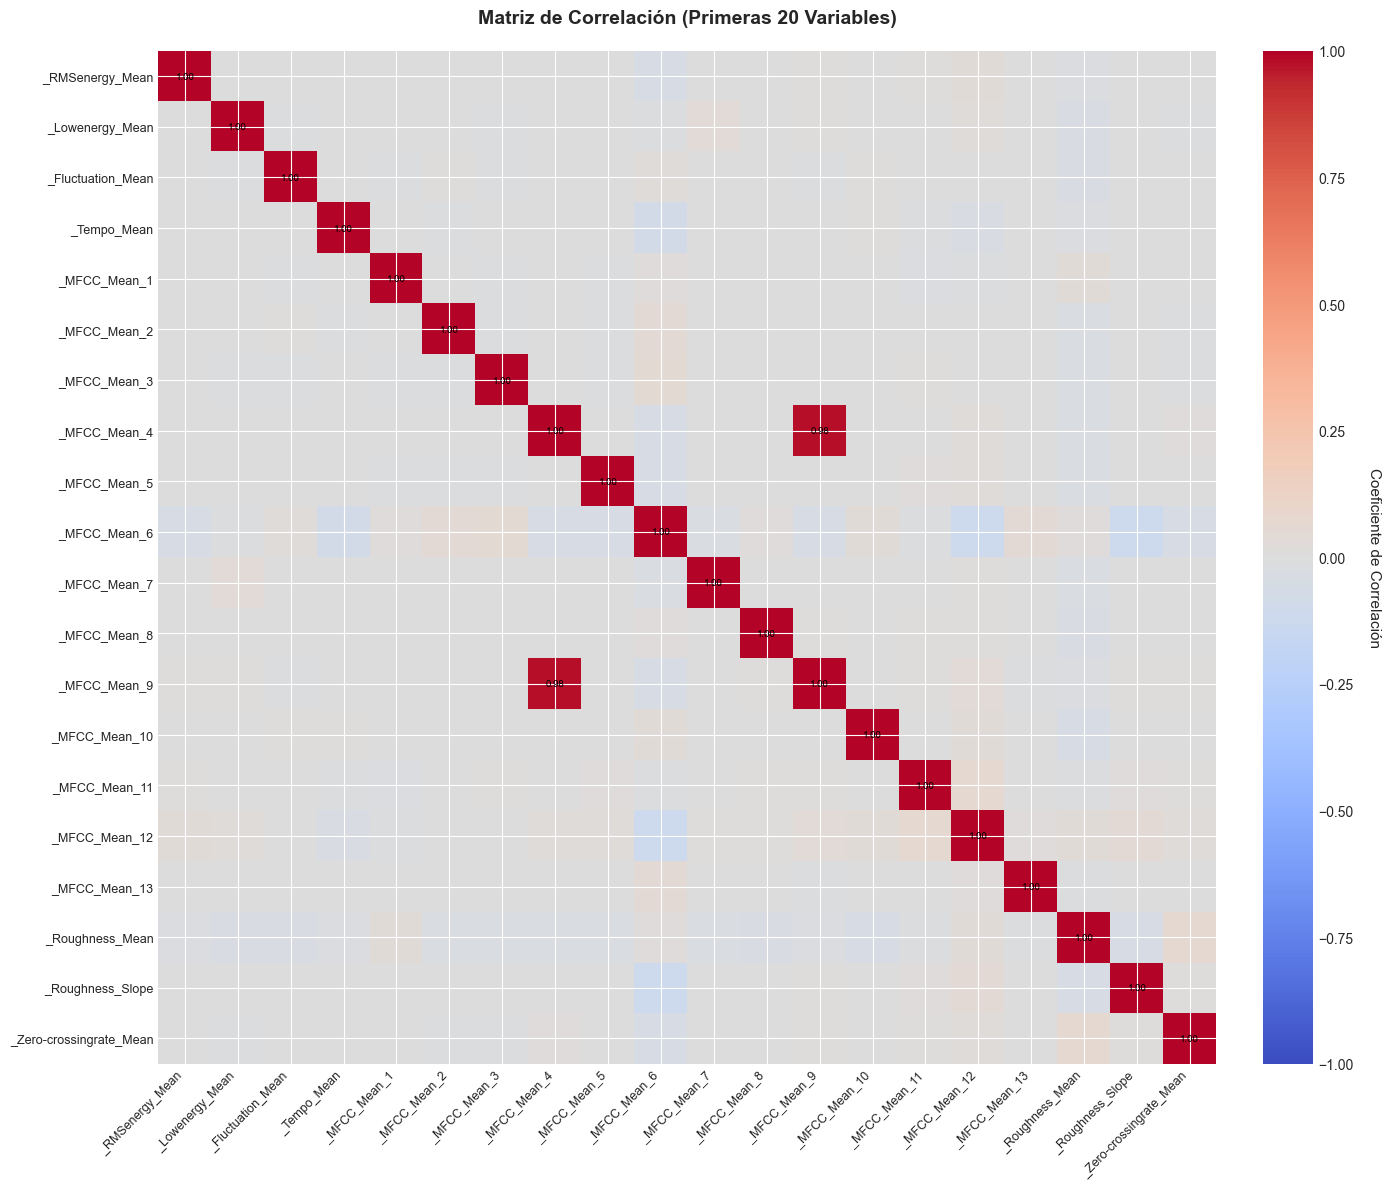

In [63]:
# Mapa de calor de correlaciones (primeras 20 variables)
fig, ax = plt.subplots(figsize=(14, 12))

corr_subset = correlation_matrix.iloc[:20, :20]
im = ax.imshow(corr_subset, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(corr_subset.columns)))
ax.set_yticks(np.arange(len(corr_subset.columns)))
ax.set_xticklabels(corr_subset.columns, rotation=45, ha='right', fontsize=9)
ax.set_yticklabels(corr_subset.columns, fontsize=9)

cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Coeficiente de Correlación', rotation=270, labelpad=20, fontsize=11)

# Añadir valores en celdas significativas
for i in range(len(corr_subset.columns)):
    for j in range(len(corr_subset.columns)):
        value = corr_subset.iloc[i, j]
        if abs(value) >= 0.5:
            text = ax.text(j, i, f'{value:.2f}',
                          ha="center", va="center", color="black", fontsize=7)

ax.set_title('Matriz de Correlación (Primeras 20 Variables)', 
            fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 7. Análisis por Clase de Emoción

In [64]:
# Estadísticas por clase de emoción
variables_analisis = variabilidad_top.index[:8]

print("Estadísticas por emoción (top 8 variables más variables):\n")

for var in variables_analisis:
    print(f"\n{var}:")
    print("-" * 60)
    stats_por_clase = df.groupby('Class')[var].agg(['mean', 'median', 'std'])
    print(stats_por_clase.round(3).to_string())
    
    max_emocion = stats_por_clase['mean'].idxmax()
    min_emocion = stats_por_clase['mean'].idxmin()
    print(f"\n  Mayor: {max_emocion} ({stats_por_clase.loc[max_emocion, 'mean']:.3f})")
    print(f"  Menor: {min_emocion} ({stats_por_clase.loc[min_emocion, 'mean']:.3f})")
    
    if len(variables_analisis) > 4 and var == variables_analisis[3]:
        print("\n...")
        break

Estadísticas por emoción (top 8 variables más variables):


_MFCC_Mean_12:
------------------------------------------------------------
        mean  median    std
Class                      
angry  0.011   0.015  0.089
happy -0.029   0.032  0.574
relax  0.037   0.044  0.208
sad    0.015   0.022  0.132

  Mayor: relax (0.037)
  Menor: happy (-0.029)

_MFCC_Mean_10:
------------------------------------------------------------
        mean  median     std
Class                       
angry  0.034   0.029   0.092
happy  0.037   0.045   0.125
relax  2.962   0.032  31.097
sad    0.014   0.020   0.192

  Mayor: relax (2.962)
  Menor: sad (0.014)

_MFCC_Mean_4:
------------------------------------------------------------
        mean  median     std
Class                       
angry  0.046   0.058   0.221
happy  9.732   0.012  98.520
relax  0.042   0.188   1.196
sad    0.004  -0.016   0.730

  Mayor: happy (9.732)
  Menor: sad (0.004)

_MFCC_Mean_8:
------------------------------------------

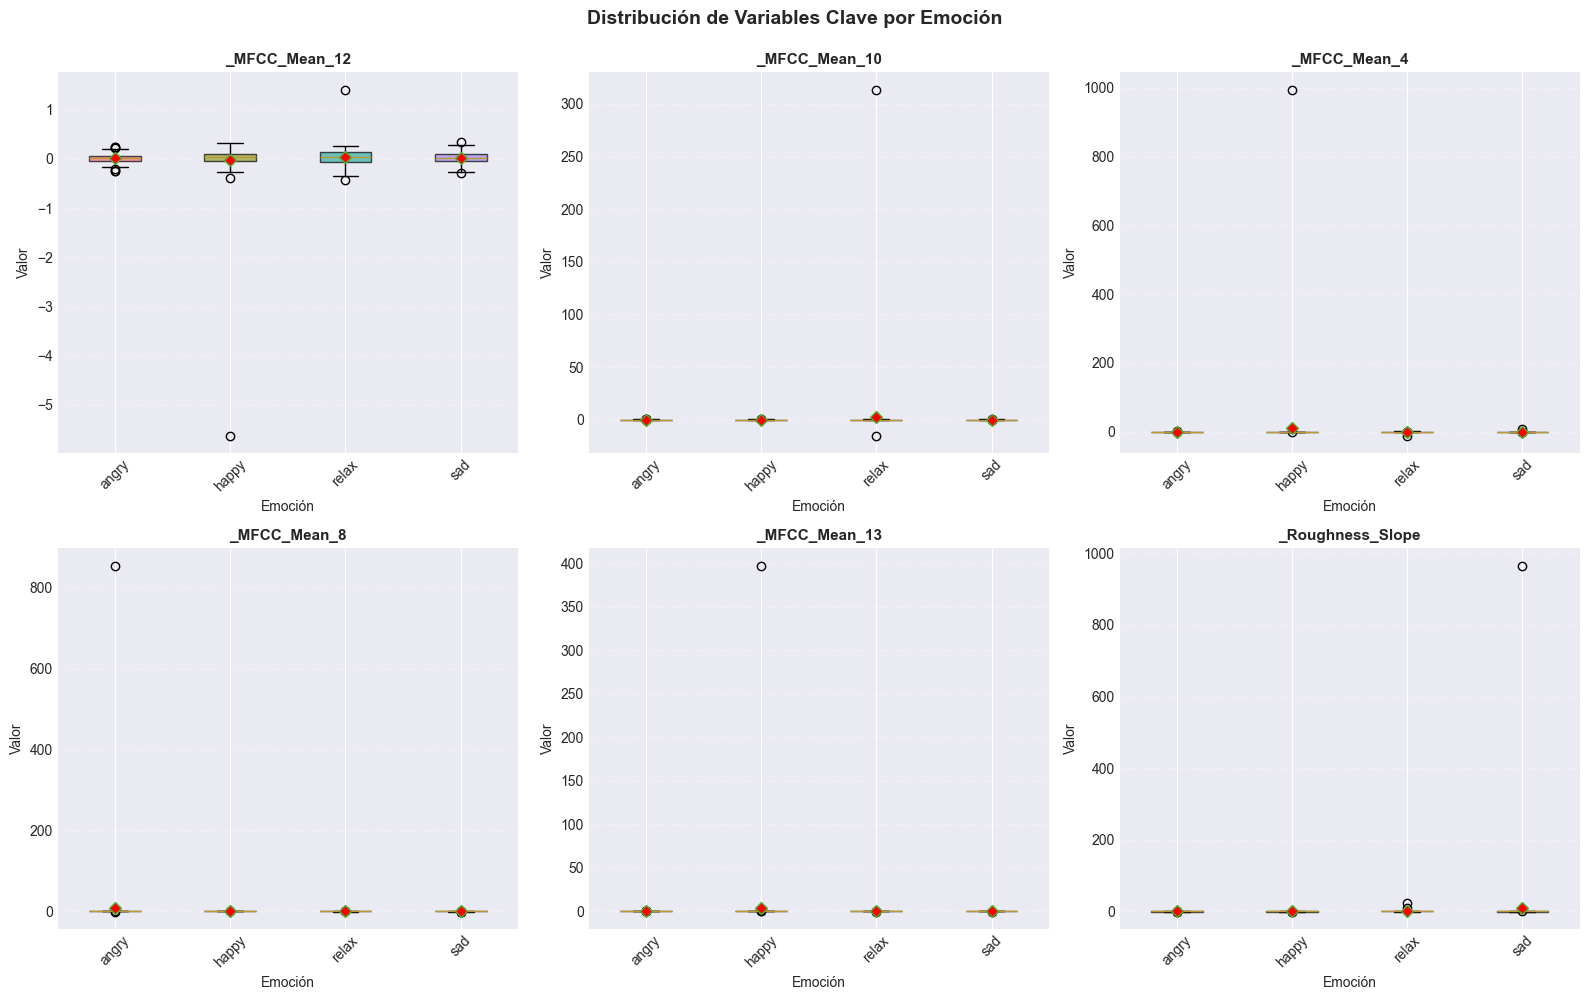

In [65]:
# Visualizar distribuciones por clase
variables_viz = variabilidad_top.index[:6]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, var in enumerate(variables_viz):
    data_por_clase = [df[df['Class'] == clase][var].dropna() 
                      for clase in sorted(df['Class'].unique())]
    
    bp = axes[idx].boxplot(data_por_clase, labels=sorted(df['Class'].unique()),
                           patch_artist=True, showmeans=True,
                           meanprops=dict(marker='D', markerfacecolor='red', markersize=6))
    
    colors = sns.color_palette("husl", len(data_por_clase))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{var}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Emoción', fontsize=10)
    axes[idx].set_ylabel('Valor', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Distribución de Variables Clave por Emoción', 
            fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 8. Análisis de Separabilidad de Clases

In [66]:
# ANOVA para identificar variables discriminativas
from scipy.stats import f_oneway

anova_results = []

for col in df_numeric.columns:
    grupos = [df[df['Class'] == clase][col].dropna() 
              for clase in df['Class'].unique()]
    
    if all(len(g) > 0 for g in grupos):
        f_stat, p_value = f_oneway(*grupos)
        anova_results.append({
            'Variable': col,
            'F-statistic': f_stat,
            'p-value': p_value,
            'Significativa': 'Sí' if p_value < 0.05 else 'No'
        })

df_anova = pd.DataFrame(anova_results).sort_values('F-statistic', ascending=False)

print("Top 20 variables más discriminativas:")
print(df_anova.head(20)[['Variable', 'F-statistic', 'p-value', 'Significativa']].to_string(index=False))

variables_significativas = df_anova[df_anova['p-value'] < 0.05]
print(f"\nVariables significativas (p < 0.05): {len(variables_significativas)} ({len(variables_significativas)/len(df_anova)*100:.1f}%)")

Top 20 variables más discriminativas:
                              Variable  F-statistic      p-value Significativa
                       _Roughness_Mean    20.568394 2.064036e-12            Sí
                    _Chromagram_Mean_6     8.958192 9.352614e-06            Sí
                          _MFCC_Mean_6     6.528982 2.551343e-04            Sí
                          _MFCC_Mean_2     2.463891 6.200288e-02            No
                         _Rolloff_Mean     2.274116 7.949125e-02            No
_HarmonicChangeDetectionFunction_Slope     2.227939 8.442311e-02            No
               _Zero-crossingrate_Mean     1.992170 1.145857e-01            No
                    _Chromagram_Mean_9     1.989703 1.149505e-01            No
                    _Chromagram_Mean_5     1.794564 1.476123e-01            No
                    _Pulseclarity_Mean     1.734752 1.592808e-01            No
                     _AttackTime_Slope     1.602881 1.881649e-01            No
              

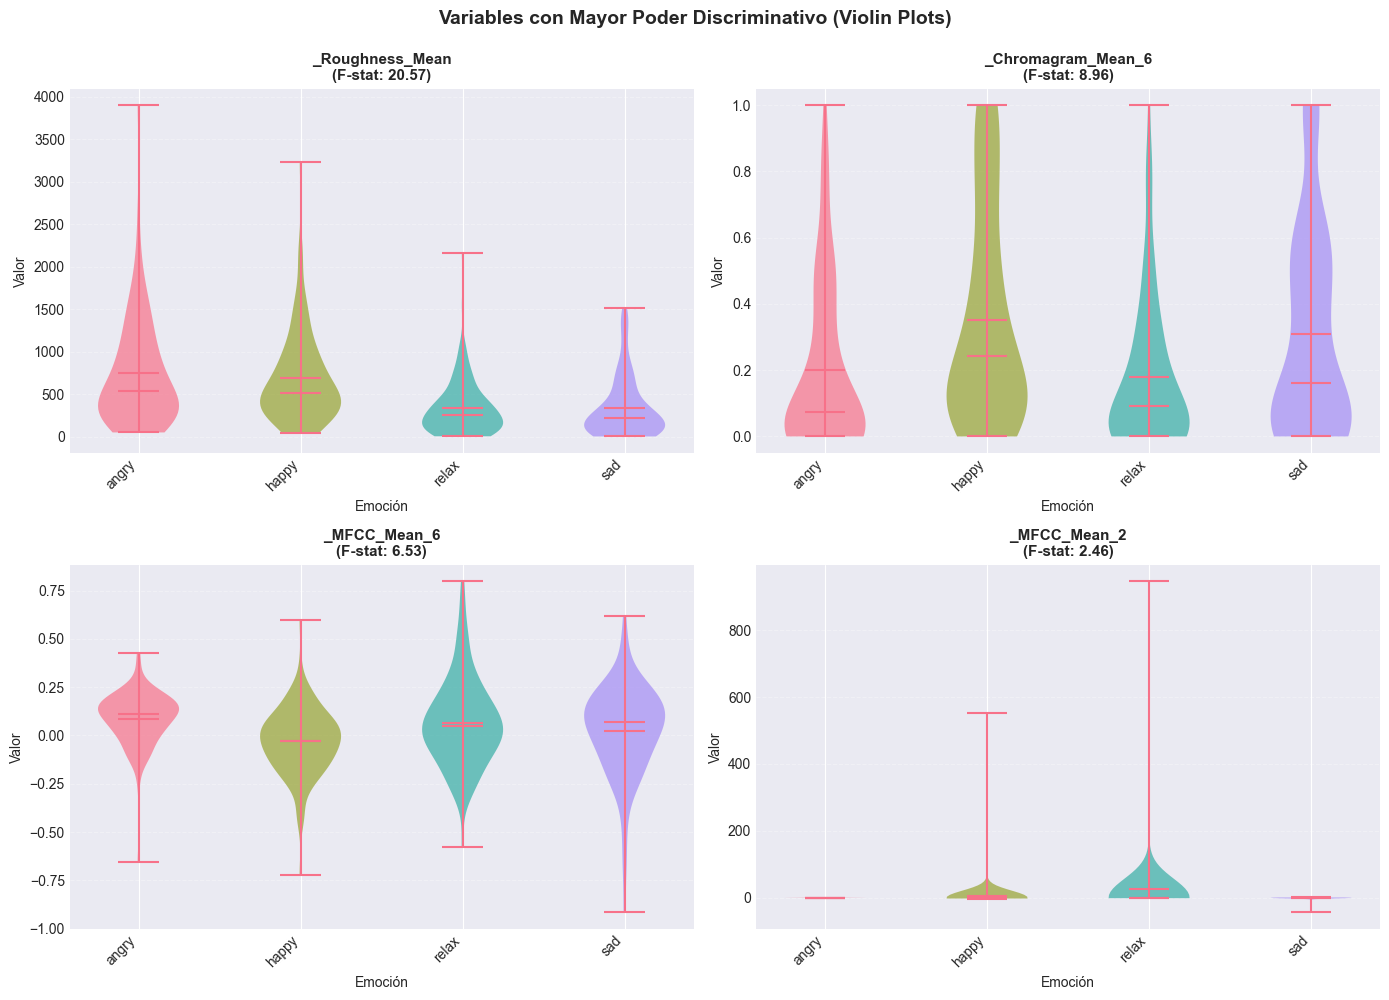

In [67]:
# Visualizar variables más discriminativas
top_discriminativas = df_anova.head(4)['Variable'].tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, var in enumerate(top_discriminativas):
    parts = axes[idx].violinplot(
        [df[df['Class'] == clase][var].dropna() for clase in sorted(df['Class'].unique())],
        positions=range(len(df['Class'].unique())),
        showmeans=True,
        showmedians=True
    )
    
    colors = sns.color_palette("husl", len(df['Class'].unique()))
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[idx].set_title(f'{var}\n(F-stat: {df_anova[df_anova["Variable"]==var]["F-statistic"].values[0]:.2f})', 
                       fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Emoción', fontsize=10)
    axes[idx].set_ylabel('Valor', fontsize=10)
    axes[idx].set_xticks(range(len(sorted(df['Class'].unique()))))
    axes[idx].set_xticklabels(sorted(df['Class'].unique()), rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Variables con Mayor Poder Discriminativo (Violin Plots)', 
            fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 9. Análisis de Componentes Principales (PCA)

In [68]:
# PCA para reducción de dimensionalidad
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada por componentes principales:")
for i in range(min(10, len(varianza_explicada))):
    print(f"  PC{i+1}: {varianza_explicada[i]*100:.2f}% (acum: {varianza_acumulada[i]*100:.2f}%)")

n_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"\nComponentes para 95% varianza: {n_componentes_95}")
print(f"Reducción: {df_numeric.shape[1]} → {n_componentes_95} ({(1-n_componentes_95/df_numeric.shape[1])*100:.1f}% menos)")

Varianza explicada por componentes principales:
  PC1: 4.02% (acum: 4.02%)
  PC2: 3.83% (acum: 7.85%)
  PC3: 3.52% (acum: 11.37%)
  PC4: 3.44% (acum: 14.80%)
  PC5: 3.33% (acum: 18.14%)
  PC6: 3.18% (acum: 21.32%)
  PC7: 3.10% (acum: 24.41%)
  PC8: 3.04% (acum: 27.45%)
  PC9: 2.86% (acum: 30.31%)
  PC10: 2.68% (acum: 32.99%)

Componentes para 95% varianza: 42
Reducción: 50 → 42 (16.0% menos)


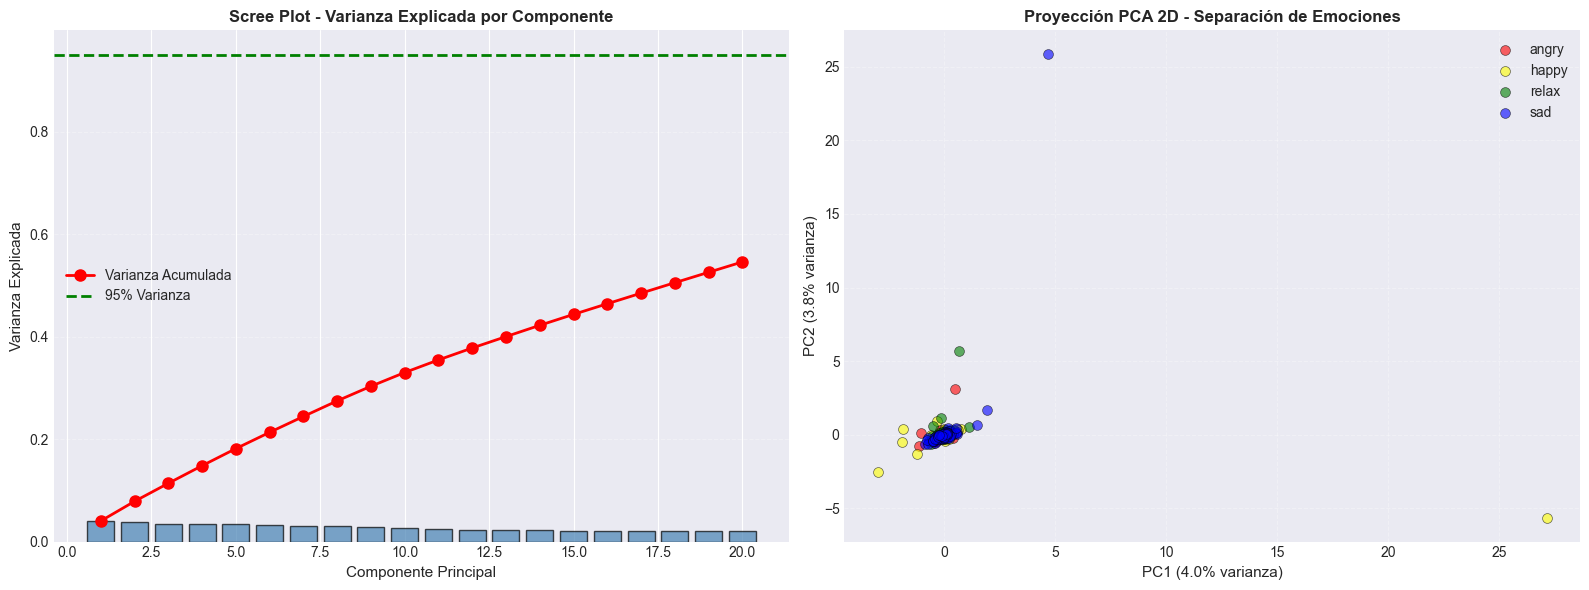

In [69]:
# Visualizar PCA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scree plot
axes[0].bar(range(1, min(21, len(varianza_explicada)+1)), 
           varianza_explicada[:20], 
           color='steelblue', alpha=0.7, edgecolor='black')
axes[0].plot(range(1, min(21, len(varianza_acumulada)+1)), 
            varianza_acumulada[:20], 
            'ro-', linewidth=2, markersize=8, label='Varianza Acumulada')
axes[0].axhline(y=0.95, color='green', linestyle='--', linewidth=2, label='95% Varianza')
axes[0].set_xlabel('Componente Principal', fontsize=11)
axes[0].set_ylabel('Varianza Explicada', fontsize=11)
axes[0].set_title('Scree Plot - Varianza Explicada por Componente', 
                 fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Proyección 2D
colors_map = {'angry': 'red', 'happy': 'yellow', 'sad': 'blue', 
              'relax': 'green', 'nan': 'gray'}

for emocion in sorted(df['Class'].unique()):
    mask = df['Class'] == emocion
    axes[1].scatter(pca_result[mask, 0], pca_result[mask, 1], 
                   c=colors_map.get(emocion, 'gray'), 
                   label=emocion, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel(f'PC1 ({varianza_explicada[0]*100:.1f}% varianza)', fontsize=11)
axes[1].set_ylabel(f'PC2 ({varianza_explicada[1]*100:.1f}% varianza)', fontsize=11)
axes[1].set_title('Proyección PCA 2D - Separación de Emociones', 
                 fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10, loc='best')
axes[1].grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()